# EDA OF GOOGLE PLAYSTORE RATINGS 

#### IMPORTING REQUIRED MODULES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### READ THE DATA

In [3]:
google_data=pd.read_csv('googleplaystore.csv')

#### EXPLORE THE DATA

In [4]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


  ####    " infering from this describe, we can say that there is only one numerical column. there can be nulls in other columns"

In [6]:
google_data.shape

(10841, 13)

In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### here we can see that there are nulls in ratings,current ver,android ver, Type,Content Rating

<AxesSubplot:>

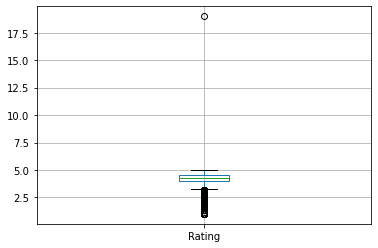

In [8]:
google_data.boxplot()

####    here we can see there is one outlier in ratings column

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

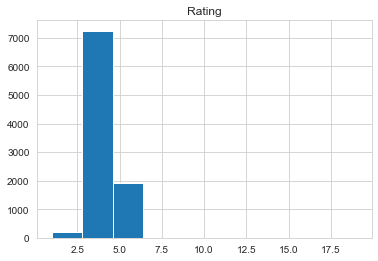

In [9]:
sns.set_style('whitegrid')
google_data.hist()

#### COUTING THE NUMBER OF NULLS IN EACH COLUMN

In [10]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### CHECKING FOR DUPLICATES

In [11]:
google_data.duplicated().sum()

483

## DATA CLEANING 

####  REMOVING DUPLICATES

In [12]:
google_data.drop_duplicates(inplace=True)

#### REMOVING THE OUTLIER

In [13]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
google_data.drop([10472],inplace=True)

In [15]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<AxesSubplot:>

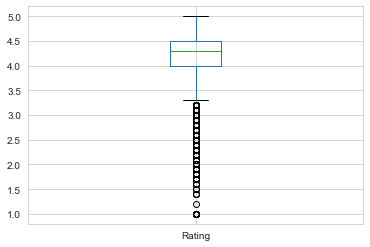

In [16]:
google_data.boxplot()

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

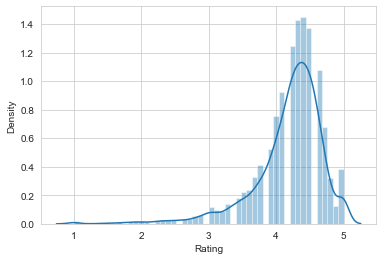

In [17]:
sns.distplot(google_data.Rating)

#### as we can see the data is right skewed data. for these kinds of data we use median instead of mean for the null values. but this can not be done for strings hence we can use mode in these cases

## DATA MANIPULATION

#### FILL IN THE NULLS

In [18]:
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())  # the data can be unimodal or bimodal

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


#### it dosent seem logical to use attributes like current_ver and android_ver for one app to another, but we are doing it for the purpose of the data manipulation. we do not use these columns for analysis.

In [19]:
# Fill the missing values with mode
google_data['Type'].fillna(str(google_data['Type'].mode()), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True) 
# here mode().values[0] is for first mode if it is bimodal

#### for ratings wew can use median to fill nulls

In [20]:
google_data['Rating'].fillna(google_data['Rating'].median(), inplace= True)
google_data['Rating']=google_data['Rating'].round(1)

In [21]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### CONVERTING NON-NUMERIC COLUMNS TO NUMERIC COLUMNS

In [22]:
google_data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9117,لعبة تقدر تربح DZ,FAMILY,4.2,238,6.8M,"10,000+",Free,0,Everyone,Education,"November 18, 2016",6.0.0.0,4.1 and up
7116,CB Martial Arts,HEALTH_AND_FITNESS,4.3,0,8.7M,10+,Free,0,Everyone,Health & Fitness,"May 15, 2018",1.1.7,4.1 and up
2995,League18,SPORTS,4.3,14123,13M,"500,000+",Free,0,Everyone,Sports,"August 1, 2018",4.0.0,4.0 and up
839,Timetable,EDUCATION,4.2,40209,Varies with device,"1,000,000+",Free,0,Everyone,Education,"May 24, 2018",Varies with device,Varies with device
9628,Edmodo,FAMILY,4.1,200214,18M,"10,000,000+",Free,0,Everyone,Education,"August 6, 2018",9.12.6,4.0.3 and up
6085,She Will Be Loved Lyrics,FAMILY,4.3,2,705k,100+,Free,0,Everyone,Entertainment,"March 1, 2016",1,2.1 and up
1273,Walk with Map My Walk,HEALTH_AND_FITNESS,4.5,144040,55M,"5,000,000+",Free,0,Everyone,Health & Fitness,"July 27, 2018",18.7.1,5.0 and up
8514,Downloader & Private Browser,TOOLS,4.3,1072565,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"July 25, 2018",Varies with device,Varies with device
8944,SDV Cam,TOOLS,3.2,67,65M,"10,000+",Free,0,Everyone,Tools,"June 2, 2017",1.0.8,4.0.3 and up
5421,Carnivores: Dinosaur Hunter,GAME,4.2,62636,17M,"1,000,000+",Free,0,Teen,Action,"July 2, 2018",1.8.0,4.0.3 and up


In [23]:
google_data['Reviews']=pd.to_numeric(google_data['Reviews'])

In [24]:
google_data['Price']= google_data['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x)

In [25]:
google_data['Price'] =pd.to_numeric(google_data['Price'],downcast='float')
google_data['Price'] = google_data['Price'].round(2)

converted both reviews and price columns to numeric datatype

In [26]:
google_data['Installs']=google_data['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
google_data['Installs']=google_data['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)

In [27]:
google_data['Installs']=pd.to_numeric(google_data['Installs'])

#### converted installs to numeric datatype

In [28]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,1.415776e+07,1.030810
std,0.485594,2.696778e+06,8.023955e+07,16.277699
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## DATA VISUALIZATION

## Category wise installs

In [29]:
grp = google_data.groupby('Category')

In [30]:
data=grp['Installs'].sum()

<BarContainer object of 33 artists>

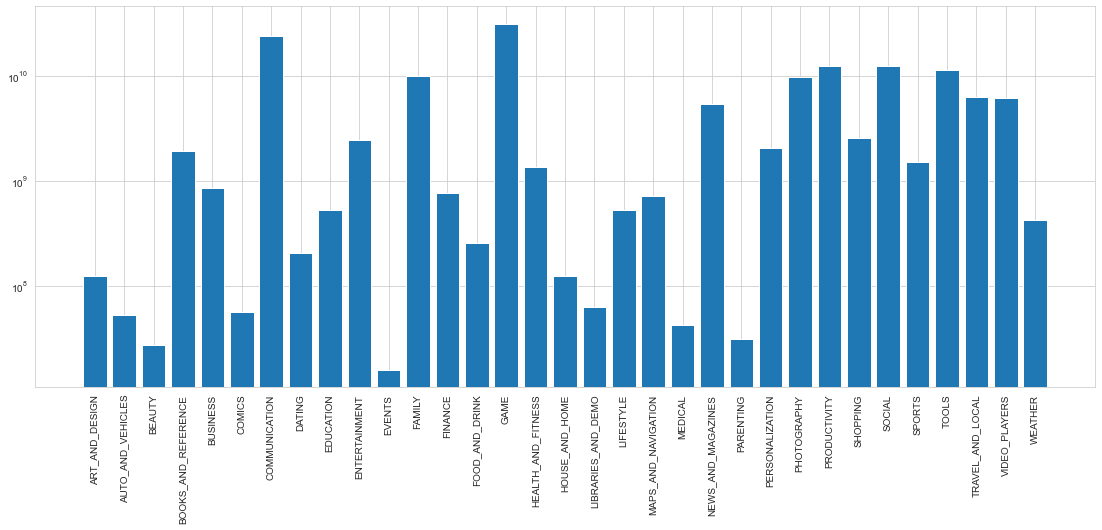

In [31]:
plt.figure(figsize=(19, 7))
plt.xticks(rotation=90)
plt.bar(data.index,data, log=True)

#### Since GAME and COMMUNICATION are the popular installed app categories let's find the average rating for these.

## average rating for GAME & COMMUNICATION categories

In [32]:
(grp['Rating'].mean()).loc['GAME'].round(1)

4.3

In [33]:
(grp['Rating'].mean()).loc['COMMUNICATION'].round(1)

4.2

## category vs reviews

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Reviews'>

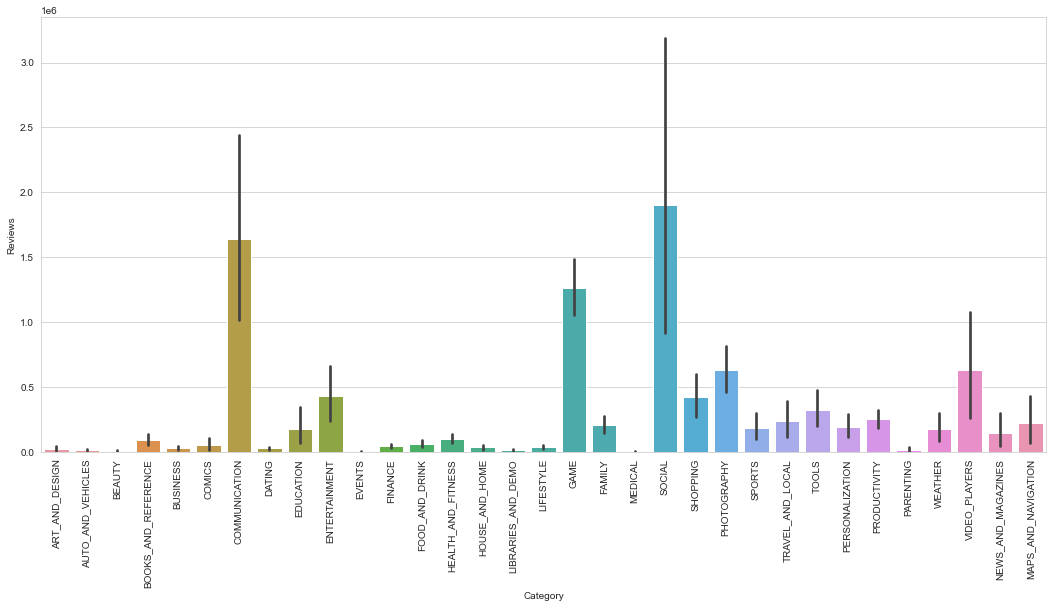

In [34]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Reviews',data=google_data)

#### SOCIAL AND COMMUNICATION ARE THE MOST REVIEWED

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

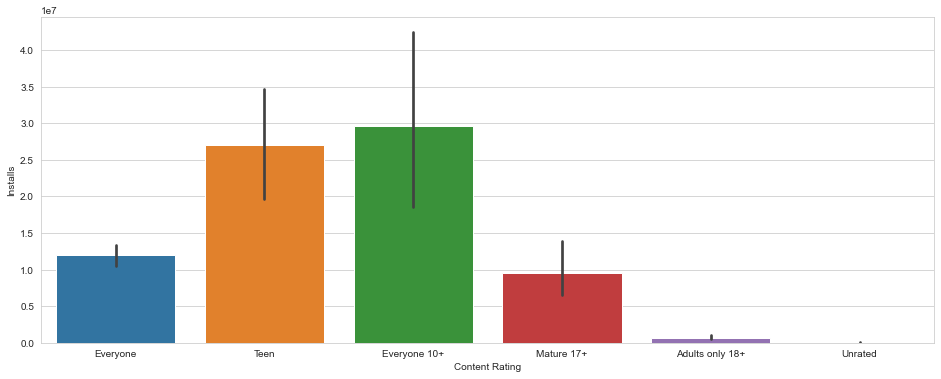

In [35]:
plt.subplots(figsize=(16,6))
sns.barplot(google_data['Content Rating'],google_data['Installs'])

#### apps targeted towards teens and everyone above 10 are the most popular

## PERCENTAGE OF FREE VS PAID APPS

In [36]:
 piechart= {'free':0,
          'paid':0}
for x in google_data.Type:
    if x == 'Paid':
        piechart['paid']+=1
    else:
        piechart['free']+=1

piechart

{'free': 9592, 'paid': 765}

Text(0.5, 1.0, 'proportion of free apps vs paid apps')

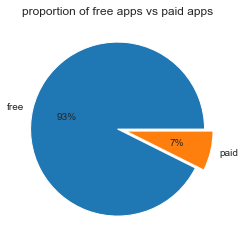

In [37]:
plt.pie(piechart.values(), labels= ['free','paid'],explode=[0,0.1],autopct='%.0f%%')
plt.title('proportion of free apps vs paid apps')

## MOST INSTALLED GAMES

In [38]:
game=google_data[google_data['Category']=='GAME']
game[['App','Installs']].sort_values(by='Installs', ascending = False).drop_duplicates().head(10).reset_index(drop=True)

,App,Installs
0,Subway Surfers,1000000000
1,Pou,500000000
2,Temple Run 2,500000000
3,My Talking Tom,500000000
4,Candy Crush Saga,500000000
5,Flow Free,100000000
6,Sniper 3D Gun Shooter: Free Shooting Games - FPS,100000000
7,Hill Climb Racing,100000000
8,Angry Birds Rio,100000000
9,Talking Tom Gold Run,100000000


## MOST INSTALLED APPS

In [39]:
google_data[['App','Installs','Category']].sort_values(by='Installs', ascending = False).drop_duplicates().head(10).reset_index(drop=True)

,App,Installs,Category
0,Hangouts,1000000000,COMMUNICATION
1,YouTube,1000000000,VIDEO_PLAYERS
2,Gmail,1000000000,COMMUNICATION
3,Google Chrome: Fast & Secure,1000000000,COMMUNICATION
4,Subway Surfers,1000000000,GAME
5,Google Drive,1000000000,PRODUCTIVITY
6,Google Photos,1000000000,PHOTOGRAPHY
7,Google Play Games,1000000000,ENTERTAINMENT
8,Google News,1000000000,NEWS_AND_MAGAZINES
9,Skype - free IM & video calls,1000000000,COMMUNICATION
